In [1]:
# Modul Dasar
import numpy as np               # Operasi matematika dan array
import pandas as pd              # Struktur data tabular (DataFrame)
import matplotlib.pyplot as plt  # Visualisasi data
import seaborn as sns            # Visualisasi data tambahan

# Statistik dan Machine Learning
from scipy import stats          # Statistik
from sklearn import datasets     # Datasets untuk machine learning
from sklearn.model_selection import train_test_split  # Pembagian data train-test
from sklearn.preprocessing import StandardScaler     # Normalisasi data
from sklearn.linear_model import LinearRegression    # Regresi linear
from sklearn.tree import DecisionTreeClassifier      # Klasifikasi menggunakan Decision Tree
from sklearn.cluster import KMeans                    # KMeans clustering

# Evaluasi Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluasi performa model

# Visualisasi Machine Learning
from sklearn.tree import plot_tree    # Visualisasi struktur Decision Tree
from sklearn.metrics import roc_curve, auc  # Kurva ROC dan AUC


from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [2]:
import numpy as np
import tensorflow as tf

# Set seed for numpy
np.random.seed(42)

# Set seed for TensorFlow
tf.random.set_seed(42)


In [3]:
data = pd.read_csv("../data/external/ihsg 14-12-22 till 22-04-24.csv")
# data = pd.read_csv("../data/external/5 tahun.csv")
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-14,6810.355957,6854.098145,6774.131836,6801.749023,6801.749023,215430000
1,2022-12-15,6801.789063,6801.837891,6740.955078,6751.859863,6751.859863,145093400
2,2022-12-16,6751.859863,6812.192871,6693.765137,6812.192871,6812.192871,156126900


In [4]:
lengh_data = len(data)
split_ratio = 0.8
lengh_train = round(lengh_data * split_ratio)
lengh_validation = lengh_data -lengh_train

In [5]:
data = data.drop(["Volume"],axis=1)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index("Date")

#hai widha

In [6]:
def time_series_to_supervised(data, n_in=1, n_out=1, dropnan=True, var_names=None):
    """
    Mengubah data time series menjadi data supervised learning.

    Argumen:
    data: DataFrame, dataset time series yang akan diubah.
    n_in: int, jumlah timestep mundur sebagai input (X).
    n_out: int, jumlah timestep maju sebagai output (y).
    dropnan: bool, apakah akan menghapus baris dengan nilai NaN.
    var_names: list of str, nama variabel untuk setiap kolom.

    Returns:
    DataFrame yang sudah diubah menjadi format supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = [], []
    
    # Input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        if var_names is None:
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        else:
            names += [(var_names[j] + '(t-%d)' % i) for j in range(n_vars)]
    
    # Output sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            if var_names is None:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [(var_names[j] + '(t)') for j in range(n_vars)]
        else:
            if var_names is None:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            else:
                names += [(var_names[j] + '(t+%d)' % i) for j in range(n_vars)]
    
    # Concatenate semua kolom
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # Hapus baris dengan nilai NaN
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

# Contoh penggunaan:
# Misalkan 'data' adalah DataFrame yang berisi data time series
# dengan tiga fitur, dan kita ingin menggunakan 3 timestep mundur sebagai input
# dan 1 timestep maju sebagai output, dan nama variabel untuk setiap fitur adalah
# 'A', 'B', dan 'C'

var_names = data.columns
data_supervised = time_series_to_supervised(data, n_in=15, n_out=1, var_names=var_names)


In [7]:
train_data = data_supervised[:lengh_train]
validation_data = data_supervised[lengh_train:]

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data train
scaled_train_data = scaler.fit_transform(train_data)

# Konversi data yang telah dinormalisasi kembali ke dalam DataFrame
scaled_train_data = pd.DataFrame(scaled_train_data, columns=train_data.columns)



In [9]:
y_train_scaled = scaled_train_data[["Open(t)"]]  # Ambil kolom Open(t) sebagai target
X_train_scaled = scaled_train_data.drop(["Open(t)", "Close(t)", "High(t)", "Low(t)", "Adj Close(t)"], axis=1)

In [10]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open(t-15)       255 non-null    float64
 1   High(t-15)       255 non-null    float64
 2   Low(t-15)        255 non-null    float64
 3   Close(t-15)      255 non-null    float64
 4   Adj Close(t-15)  255 non-null    float64
 5   Open(t-14)       255 non-null    float64
 6   High(t-14)       255 non-null    float64
 7   Low(t-14)        255 non-null    float64
 8   Close(t-14)      255 non-null    float64
 9   Adj Close(t-14)  255 non-null    float64
 10  Open(t-13)       255 non-null    float64
 11  High(t-13)       255 non-null    float64
 12  Low(t-13)        255 non-null    float64
 13  Close(t-13)      255 non-null    float64
 14  Adj Close(t-13)  255 non-null    float64
 15  Open(t-12)       255 non-null    float64
 16  High(t-12)       255 non-null    float64
 17  Low(t-12)       

In [11]:
y_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open(t)  255 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [12]:
# Misalnya, Anda memiliki 3 langkah waktu dan 5 fitur
timesteps = 15
features = 5
X_train = []
for i in range(timesteps):
    X_train.append(X_train_scaled.iloc[:, i*features:(i+1)*features].values)

# Ubah list menjadi array numpy
X_train = np.array(X_train)
X_train = X_train.transpose(1, 0, 2)
# Bentuknya menjadi (jumlah_sampel, timestep, feature)
print(X_train.shape)

(255, 15, 5)


In [13]:
from keras.layers import LSTM
from keras.layers import Bidirectional

model_lstm = Sequential()
model_lstm.add(Bidirectional(LSTM(128, activation='relu',return_sequences=True, input_shape=(X_train.shape[1], 5))))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(128,activation='relu', return_sequences=False))
model_lstm.add(Dense(128))
model_lstm.add(Dense(1))


In [14]:
early_stopping = EarlyStopping(monitor='loss', patience=20, verbose=1, restore_best_weights=True)

model_lstm.compile(optimizer='adam', loss="mse",metrics=["mse"])



In [15]:
# Fit the model with early stopping
hist = model_lstm.fit(X_train, train_data['Open(t)'], 
                      epochs=200, 
                      batch_size=32,
                      callbacks=[early_stopping])

Epoch 1/200


8/8 [==============================] - 6s 35ms/step - loss: 47418148.0000 - mse: 47418148.0000
Epoch 2/200
8/8 [==============================] - 0s 34ms/step - loss: 46094048.0000 - mse: 46094048.0000
Epoch 3/200
8/8 [==============================] - 0s 34ms/step - loss: 35042168.0000 - mse: 35042168.0000
Epoch 4/200
8/8 [==============================] - 0s 35ms/step - loss: 20022354.0000 - mse: 20022354.0000
Epoch 5/200
8/8 [==============================] - 0s 35ms/step - loss: 12032523.0000 - mse: 12032523.0000
Epoch 6/200
8/8 [==============================] - 0s 34ms/step - loss: 4000201.5000 - mse: 4000201.5000
Epoch 7/200
8/8 [==============================] - 0s 34ms/step - loss: 596629.1250 - mse: 596629.1250
Epoch 8/200
1/8 [==>...........................] - ETA: 0s - loss: 339889.7812 - mse: 339889.7812

KeyboardInterrupt: 

In [ ]:
y_pred = model_lstm.predict(X_train)

8/8 [==============================] - 1s 10ms/step


In [ ]:
y_pred.shape

(255, 1)

In [ ]:
y_pred.squeeze()

array([6936.0713, 6937.328 , 6927.3086, 6870.5566, 6844.2485, 6805.2246,
       6768.323 , 6744.93  , 6732.6953, 6756.2485, 6751.8594, 6776.407 ,
       6789.2   , 6849.5317, 6900.6914, 6910.431 , 6933.453 , 6951.85  ,
       6947.693 , 6935.277 , 6908.2646, 6902.601 , 6911.238 , 6909.371 ,
       6919.37  , 6933.6514, 6930.71  , 6933.02  , 6928.7876, 6931.137 ,
       6945.8486, 6945.8076, 6945.8096, 6922.0776, 6916.869 , 6918.783 ,
       6911.6836, 6912.3413, 6912.4844, 6916.8457, 6898.9443, 6901.158 ,
       6869.1753, 6882.4624, 6868.88  , 6840.115 , 6832.1377, 6824.512 ,
       6806.813 , 6785.24  , 6746.7734, 6720.4443, 6716.084 , 6688.393 ,
       6697.5947, 6719.091 , 6720.0312, 6735.085 , 6778.0117, 6815.5405,
       6831.6514, 6864.3057, 6875.201 , 6855.763 , 6840.8916, 6854.3076,
       6854.3257, 6836.3994, 6830.537 , 6823.0693, 6812.826 , 6820.837 ,
       6849.7627, 6868.286 , 6899.2573, 6916.249 , 6931.368 , 6917.8057,
       6923.948 , 6915.325 , 6894.501 , 6866.2725, 

In [ ]:
train_data['Open(t)']

Date
2023-01-04    6888.798828
2023-01-05    6813.279785
2023-01-06    6653.759766
2023-01-09    6684.558105
2023-01-10    6688.265137
                 ...     
2024-01-19    7271.341797
2024-01-22    7233.172852
2024-01-23    7232.516113
2024-01-24    7255.770020
2024-01-25    7215.526855
Name: Open(t), Length: 255, dtype: float64

In [ ]:
mse = np.mean((y_pred.squeeze() - train_data['Open(t)'])**2)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 4538.163861165402
RMSE: 67.36589538605868


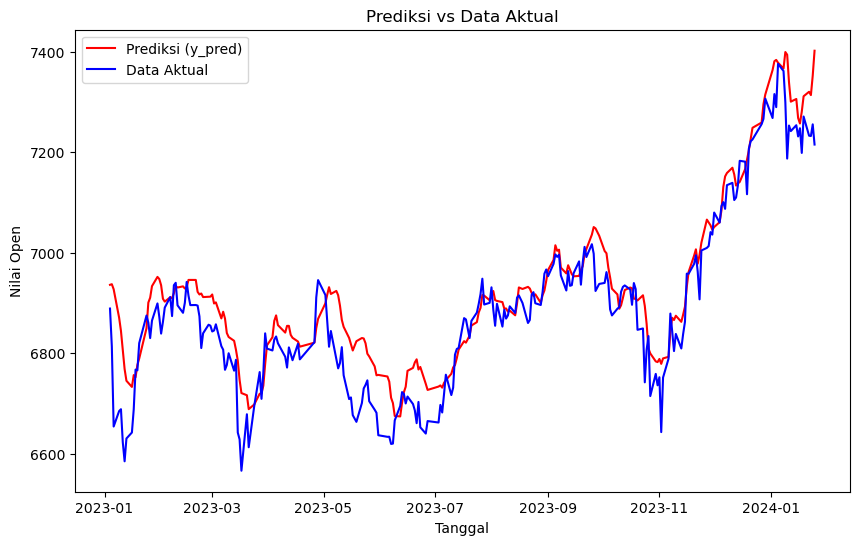

In [ ]:
import matplotlib.pyplot as plt

# Plot hasil prediksi (y_pred) dan data aktual (train_data['Open(t)'])
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, y_pred.squeeze(), label='Prediksi (y_pred)', color='red')
plt.plot(train_data.index, train_data['Open(t)'], label='Data Aktual', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Open')
plt.title('Prediksi vs Data Aktual')
plt.legend()
plt.show()


In [ ]:
scaled_val_data = scaler.fit_transform(validation_data)

# Konversi data yang telah dinormalisasi kembali ke dalam DataFrame
scaled_val_data = pd.DataFrame(scaled_val_data, columns=validation_data.columns)

In [ ]:
scaled_val_data

,Open(t-15),High(t-15),Low(t-15),Close(t-15),Adj Close(t-15),Open(t-14),High(t-14),Low(t-14),Close(t-14),Adj Close(t-14),...,Open(t-1),High(t-1),Low(t-1),Close(t-1),Adj Close(t-1),Open(t),High(t),Low(t),Close(t),Adj Close(t)
0,0.832718,0.823219,0.858695,0.720836,0.720836,0.780944,0.786917,0.601128,0.494510,0.494510,...,0.291075,0.302442,0.336588,0.156050,0.156050,0.074196,0.080254,0.176720,0.143848,0.143848
1,0.780944,0.786917,0.601128,0.494510,0.494510,0.554585,0.503715,0.276769,0.213064,0.213064,...,0.074196,0.000000,0.099898,0.020653,0.020653,0.058582,0.115435,0.221554,0.201903,0.201903
2,0.554585,0.503715,0.276769,0.213064,0.213064,0.146671,0.322879,0.183643,0.304526,0.304526,...,0.058582,0.038250,0.148916,0.087062,0.087062,0.056940,0.228876,0.273767,0.303178,0.303178
3,0.146671,0.322879,0.183643,0.304526,0.304526,0.386163,0.385084,0.412662,0.279772,0.279772,...,0.056940,0.161591,0.206001,0.202910,0.202910,0.283465,0.338601,0.439673,0.348626,0.348626
4,0.386163,0.385084,0.412662,0.279772,0.279772,0.345849,0.365522,0.364168,0.351252,0.351252,...,0.283465,0.280889,0.387388,0.254898,0.254898,0.312761,0.341834,0.437005,0.330577,0.330577
5,0.345849,0.365522,0.364168,0.351252,0.351252,0.388304,0.398151,0.366040,0.293400,0.293400,...,0.312761,0.284405,0.384471,0.234251,0.234251,0.312928,0.310688,0.405140,0.437772,0.437772
6,0.388304,0.398151,0.366040,0.293400,0.293400,0.306848,0.352686,0.378745,0.356818,0.356818,...,0.312928,0.250541,0.349632,0.356871,0.356871,0.365844,0.359602,0.421480,0.321673,0.321673
7,0.306848,0.352686,0.378745,0.356818,0.356818,0.366379,0.298053,0.216439,0.214521,0.214521,...,0.365844,0.303723,0.367498,0.224067,0.224067,0.341206,0.404487,0.494467,0.462694,0.462694
8,0.366379,0.298053,0.216439,0.214521,0.214521,0.187643,0.348870,0.294595,0.391183,0.391183,...,0.341206,0.352525,0.447295,0.385380,0.385380,0.460611,0.458811,0.531873,0.427271,0.427271
9,0.187643,0.348870,0.294595,0.391183,0.391183,0.451186,0.386745,0.244843,0.304881,0.304881,...,0.460611,0.411588,0.488191,0.344859,0.344859,0.472127,0.526029,0.601745,0.607957,0.607957


In [ ]:
y_val_scaled = scaled_val_data[["Open(t)"]]  # Ambil kolom Open(t) sebagai target
X_val_scaled = scaled_val_data.drop(["Open(t)", "Close(t)", "High(t)", "Low(t)", "Adj Close(t)"], axis=1)

In [ ]:

X_val = []
for i in range(timesteps):
    X_val.append(X_val_scaled.iloc[:, i*features:(i+1)*features].values)

# Ubah list menjadi array numpy
X_val = np.array(X_val)
X_val = X_val.transpose(1, 0, 2)
# Bentuknya menjadi (jumlah_sampel, timestep, feature)
print(X_val.shape)

(49, 15, 5)


In [ ]:
y_val_pred = model_lstm.predict(X_val)

2/2 [==============================] - 0s 9ms/step


In [ ]:
y_val_pred.squeeze()

array([6916.7744, 6854.6035, 6702.947 , 6670.287 , 6651.799 , 6693.928 ,
       6703.2227, 6732.3516, 6759.7   , 6794.2427, 6855.87  , 6857.3193,
       6895.581 , 6911.095 , 6862.204 , 6920.1084, 6947.2754, 6975.79  ,
       6977.783 , 6980.0117, 6976.332 , 6916.135 , 6926.8223, 6910.0557,
       6935.039 , 6824.992 , 6880.667 , 6976.506 , 7037.419 , 7189.5034,
       7282.611 , 7255.342 , 7233.871 , 7181.412 , 7160.2607, 7181.528 ,
       7154.6655, 7113.1084, 7022.5596, 6947.721 , 6928.559 , 6887.334 ,
       6977.714 , 7080.9033, 7069.6807, 6926.3755, 6724.3105, 6702.2812,
       6673.703 ], dtype=float32)

In [ ]:
validation_data['Open(t)']

Date
2024-01-26    7152.269043
2024-01-29    7147.714844
2024-01-30    7147.235840
2024-01-31    7213.307129
2024-02-01    7221.852051
2024-02-02    7221.900879
2024-02-05    7237.334961
2024-02-06    7230.148926
2024-02-07    7264.976074
2024-02-12    7268.334961
2024-02-13    7301.587891
2024-02-15    7337.630859
2024-02-16    7337.815918
2024-02-19    7323.312012
2024-02-20    7320.723145
2024-02-21    7345.791016
2024-02-22    7334.952148
2024-02-23    7326.526855
2024-02-26    7277.640137
2024-02-27    7263.987793
2024-02-28    7292.075195
2024-02-29    7326.803223
2024-03-01    7318.666016
2024-03-04    7318.832031
2024-03-05    7296.534180
2024-03-06    7252.084961
2024-03-07    7338.731934
2024-03-08    7398.429199
2024-03-13    7422.301758
2024-03-14    7405.566895
2024-03-15    7408.658203
2024-03-18    7338.076172
2024-03-19    7320.538086
2024-03-20    7303.929199
2024-03-21    7360.558105
2024-03-22    7327.514160
2024-03-25    7339.523926
2024-03-26    7337.661133
2024-03

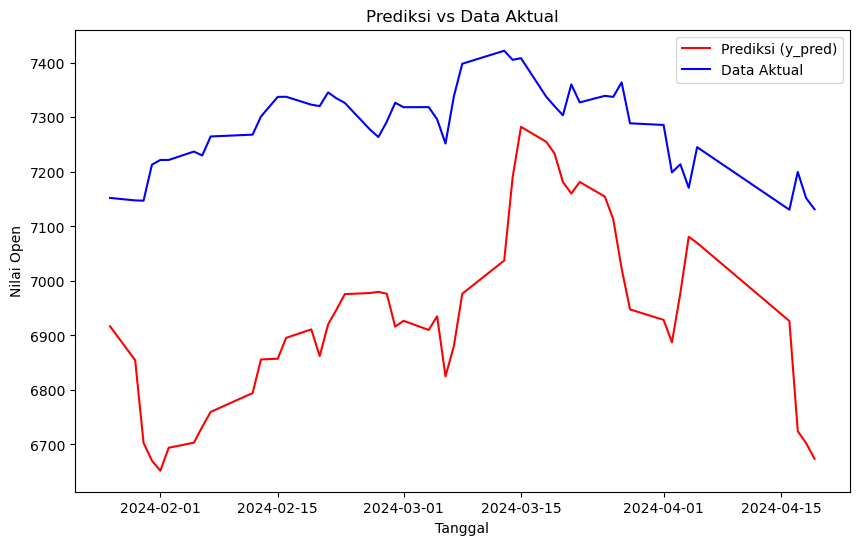

In [ ]:
import matplotlib.pyplot as plt

# Plot hasil prediksi (y_pred) dan data aktual (train_data['Open(t)'])
plt.figure(figsize=(10, 6))
plt.plot(validation_data.index, y_val_pred.squeeze(), label='Prediksi (y_pred)', color='red')
plt.plot(validation_data.index, validation_data['Open(t)'], label='Data Aktual', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Open')
plt.title('Prediksi vs Data Aktual')
plt.legend()
plt.show()


In [ ]:
mse = np.mean((y_val_pred.squeeze() - validation_data['Open(t)'])**2)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 138555.0676307533
RMSE: 372.2298585964771
